## **Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#to plot the graph embedded in the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load the datasets**

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/PythonProject/heart.csv')
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#total number of rows and coloums in the data
heart_df.shape

(270, 14)

In [ ]:
# Information about data types and null values
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#checking for missing values
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
#ststistical representation of the data
heart_df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
#checking distribution of the target variable
heart_df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [ ]:
#check what percentage of each column's data is missing
heart_df.isnull().sum()/len(heart_df)

Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

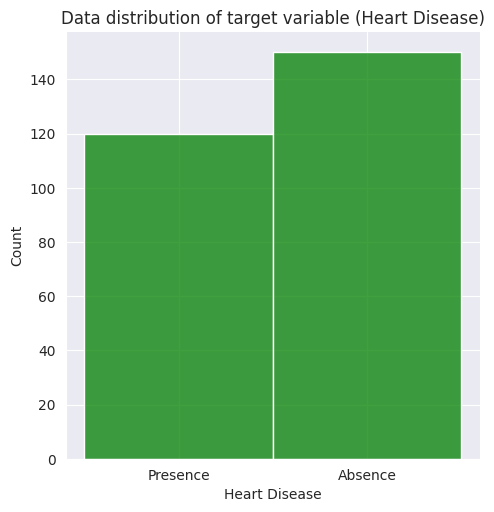

In [ ]:
# Let's use the displot function from the seaborn
# to visualise data distribution of the target variable.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Heart Disease'], bins=30, color='green')
  plt.title("Data distribution of target variable (Heart Disease)");


### **Distribution of each feature**

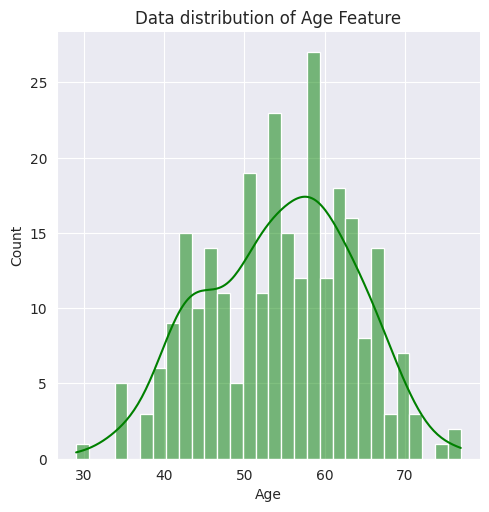

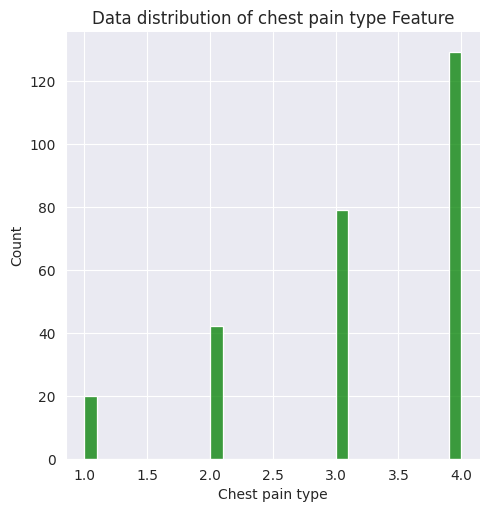

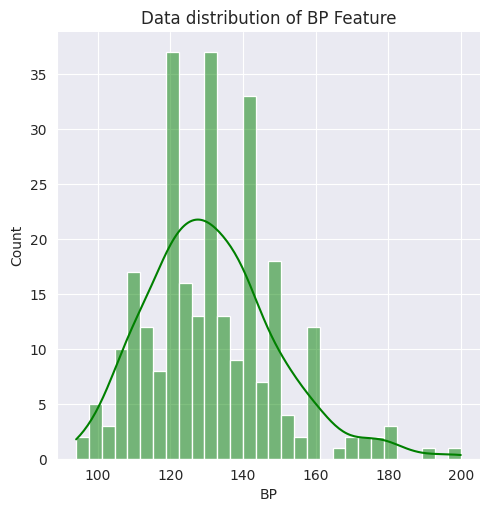

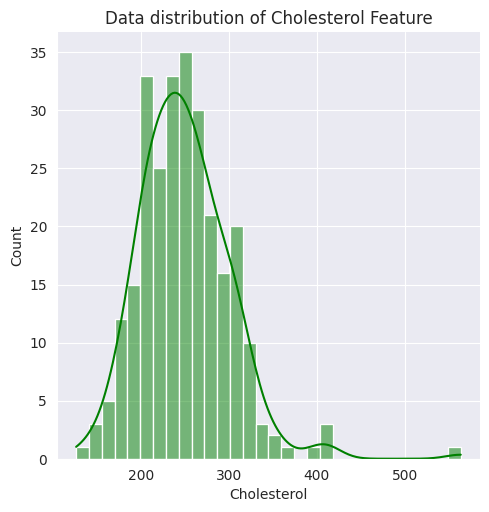

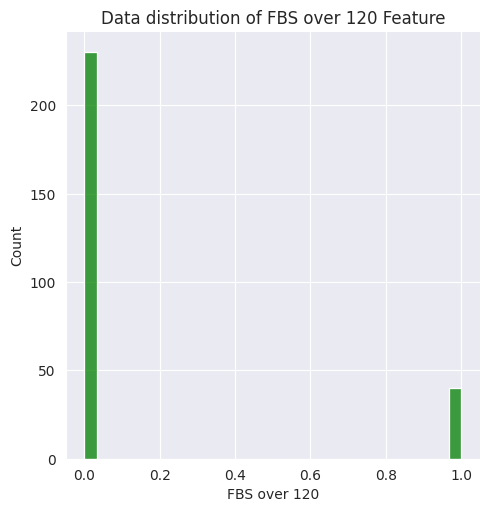

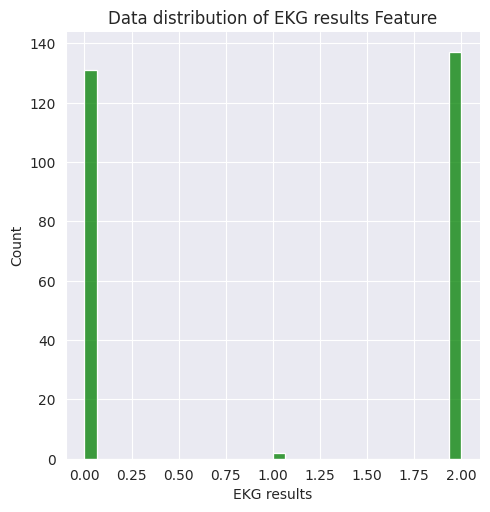

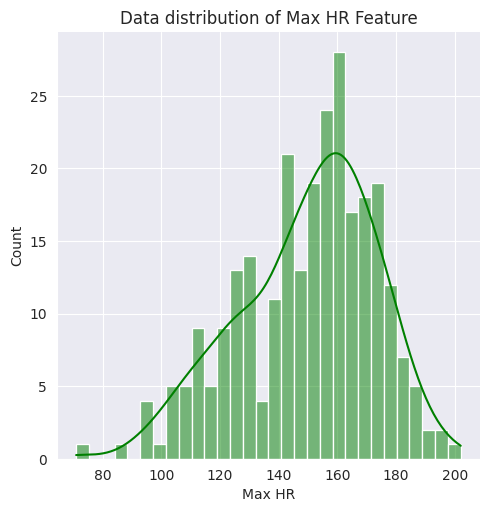

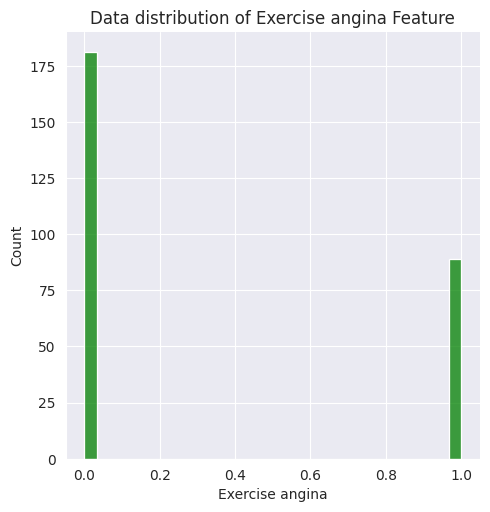

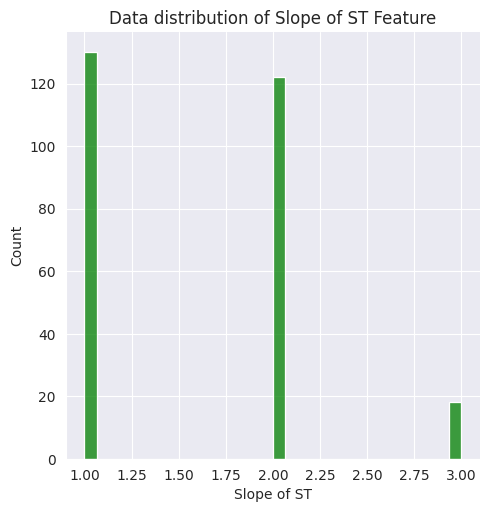

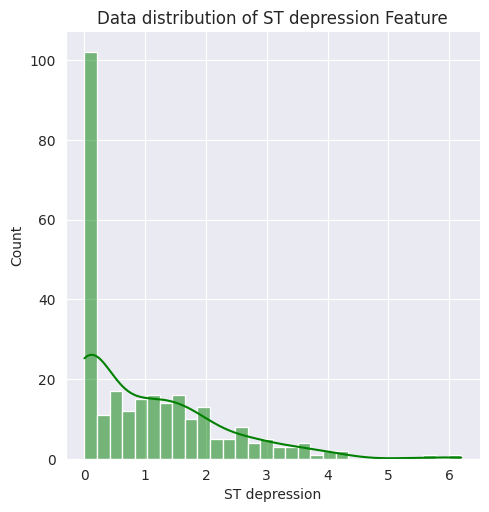

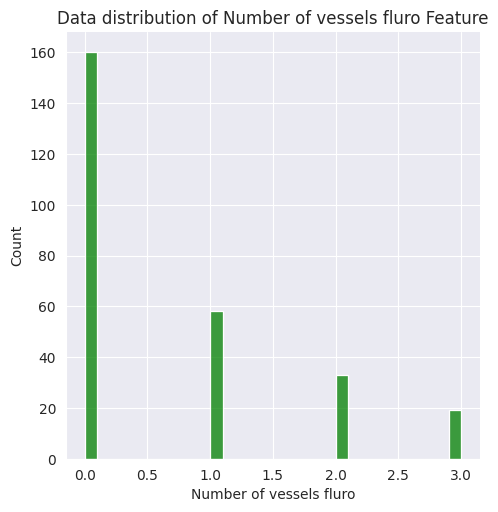

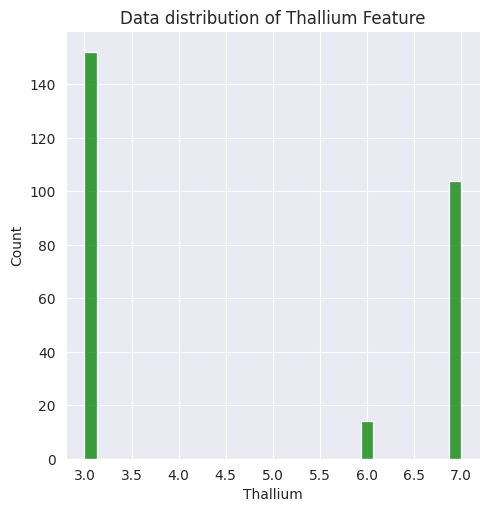

In [ ]:
# Let's use the displot function from the seaborn
# to visualise data distribution of the age.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Age'],kde=True, bins=30, color='green')
  plt.title("Data distribution of Age Feature");

    # to visualise data distribution of the chest pain type .
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Chest pain type'],bins=30, color='green')
  plt.title("Data distribution of chest pain type Feature");


 # to visualise data distribution of the BP.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['BP'],kde=True, bins=30, color='green')
  plt.title("Data distribution of BP Feature");

     # to visualise data distribution of the Cholesterol.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Cholesterol'], kde=True, bins=30, color='green')
  plt.title("Data distribution of Cholesterol Feature");


      # to visualise data distribution of the FBS over 120.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['FBS over 120'], bins=30, color='green')
  plt.title("Data distribution of FBS over 120 Feature");


     # to visualise data distribution of the EKG results.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['EKG results'], bins=30, color='green')
  plt.title("Data distribution of EKG results Feature");

     # to visualise data distribution of the Max HR.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Max HR'],kde=True, bins=30, color='green')
  plt.title("Data distribution of Max HR Feature");

     # to visualise data distribution of the Exercise angina.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Exercise angina'], bins=30, color='green')
  plt.title("Data distribution of Exercise angina Feature");


     # to visualise data distribution of the Slope of ST.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Slope of ST'], bins=30, color='green')
  plt.title("Data distribution of Slope of ST Feature");


     # to visualise data distribution of the ST depression.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['ST depression'],kde=True, bins=30, color='green')
  plt.title("Data distribution of ST depression Feature");

       # to visualise data distribution of the Number of vessels fluro.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Number of vessels fluro'], bins=30, color='green')
  plt.title("Data distribution of Number of vessels fluro Feature");


                   # to visualise data distribution of the Number of Thallium.
with sns.axes_style('darkgrid'):
  sns.displot(heart_df['Thallium'], bins=30, color='green')
  plt.title("Data distribution of Thallium Feature");

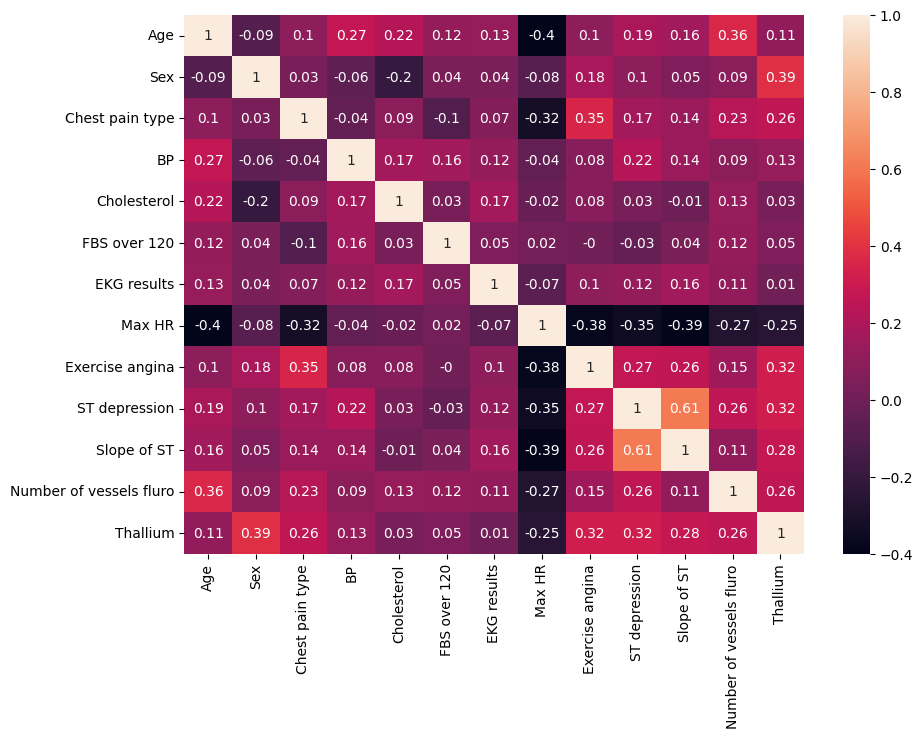

In [ ]:
# corr() to calculate the correlation between variables
correlation_matrix = heart_df.corr(numeric_only=True).round(2)
# changing the figure size
plt.figure(figsize =(10, 7))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

In [ ]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = heart_df.corr(numeric_only=True)

# Select the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 (you can adjust this threshold)
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.95)]

# Drop the highly correlated features
heart_df_dropped = heart_df.drop(heart_df[to_drop], axis=1)
heart_df_dropped


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


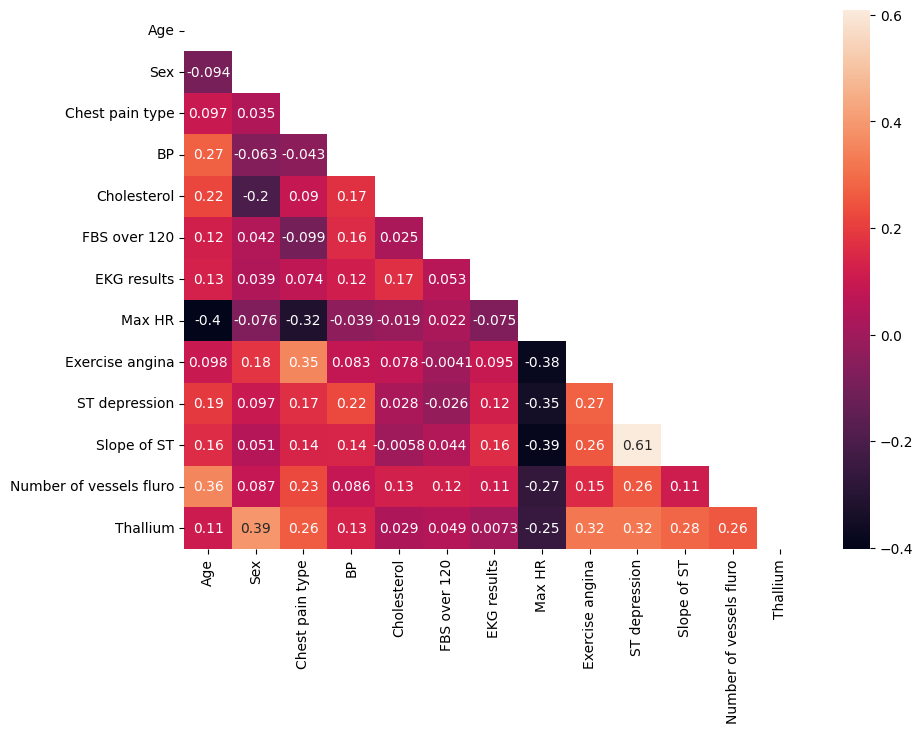

In [ ]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (10, 7))
# "annot = true" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

## **Drop strongly corelated features(>60%)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you've loaded your dataset into a DataFrame named heart_df

# Splitting the dataset
X = heart_df.drop("Heart Disease", axis=1)  # This assumes "Heart Disease" is your target column
Y = heart_df["Heart Disease"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Using RFE for feature selection
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X_train, Y_train)

# Displaying the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

# Updating X_train and X_test to keep only the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# If you also want to update the original dataframe
heart_df = pd.concat([heart_df["Heart Disease"], heart_df[selected_features]], axis=1)
heart_df


Selected Features: Index(['Sex', 'Chest pain type', 'Exercise angina', 'ST depression',
       'Number of vessels fluro'],
      dtype='object')


,Heart Disease,Sex,Chest pain type,Exercise angina,ST depression,Number of vessels fluro
0,Presence,1,4,0,2.4,3
1,Absence,0,3,0,1.6,0
2,Presence,1,2,0,0.3,0
3,Absence,1,4,1,0.2,1
4,Absence,0,2,1,0.2,1
...,...,...,...,...,...,...
265,Absence,1,3,0,0.5,0
266,Absence,1,2,0,0.0,0
267,Absence,0,2,0,1.3,0
268,Absence,1,4,0,0.4,0


In [ ]:
# dropping correlated varaibles
#$#heart_df = heart_df.drop(['Slope of ST', 'ST depression'], axis=1)
#$#heart_df


In [ ]:
columns_to_drop = ['Slope of ST', 'ST depression']
for column in columns_to_drop:
    if column in heart_df.columns:
        heart_df.drop(column, axis=1, inplace=True)
heart_df


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,3,3,Presence
1,67,0,3,115,564,0,2,160,0,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0,7,Presence
3,64,1,4,128,263,0,0,105,1,1,7,Absence
4,74,0,2,120,269,0,2,121,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0,7,Absence
267,56,0,2,140,294,0,2,153,0,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0,6,Absence


In [ ]:
print(heart_df.columns)


Index(['Heart Disease', 'Sex', 'Chest pain type', 'Exercise angina',
       'ST depression', 'Number of vessels fluro'],
      dtype='object')


<Axes: >

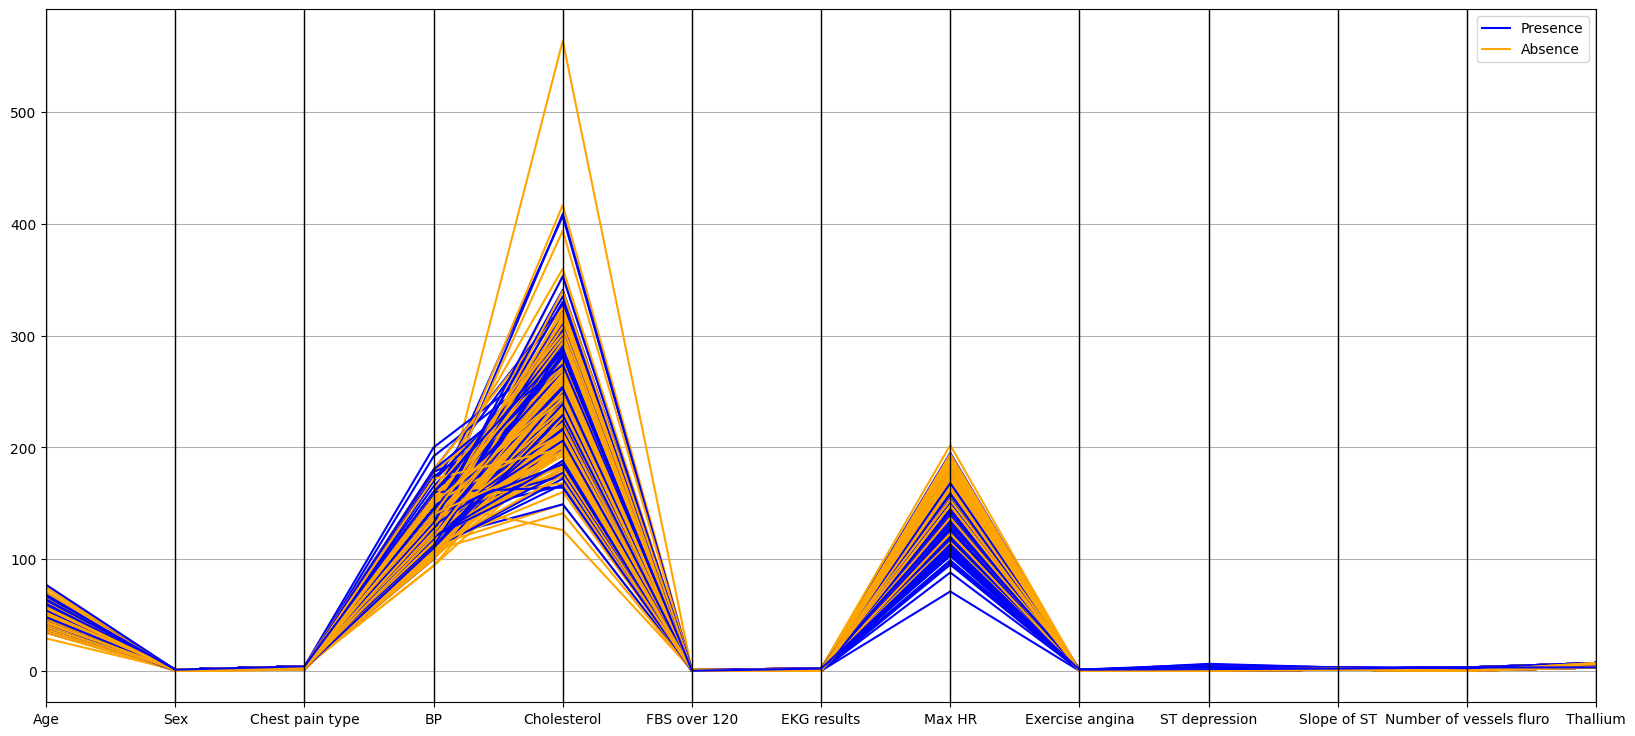

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (20, 9))
parallel_coordinates(heart_df, "Heart Disease", color=['blue', 'orange'])


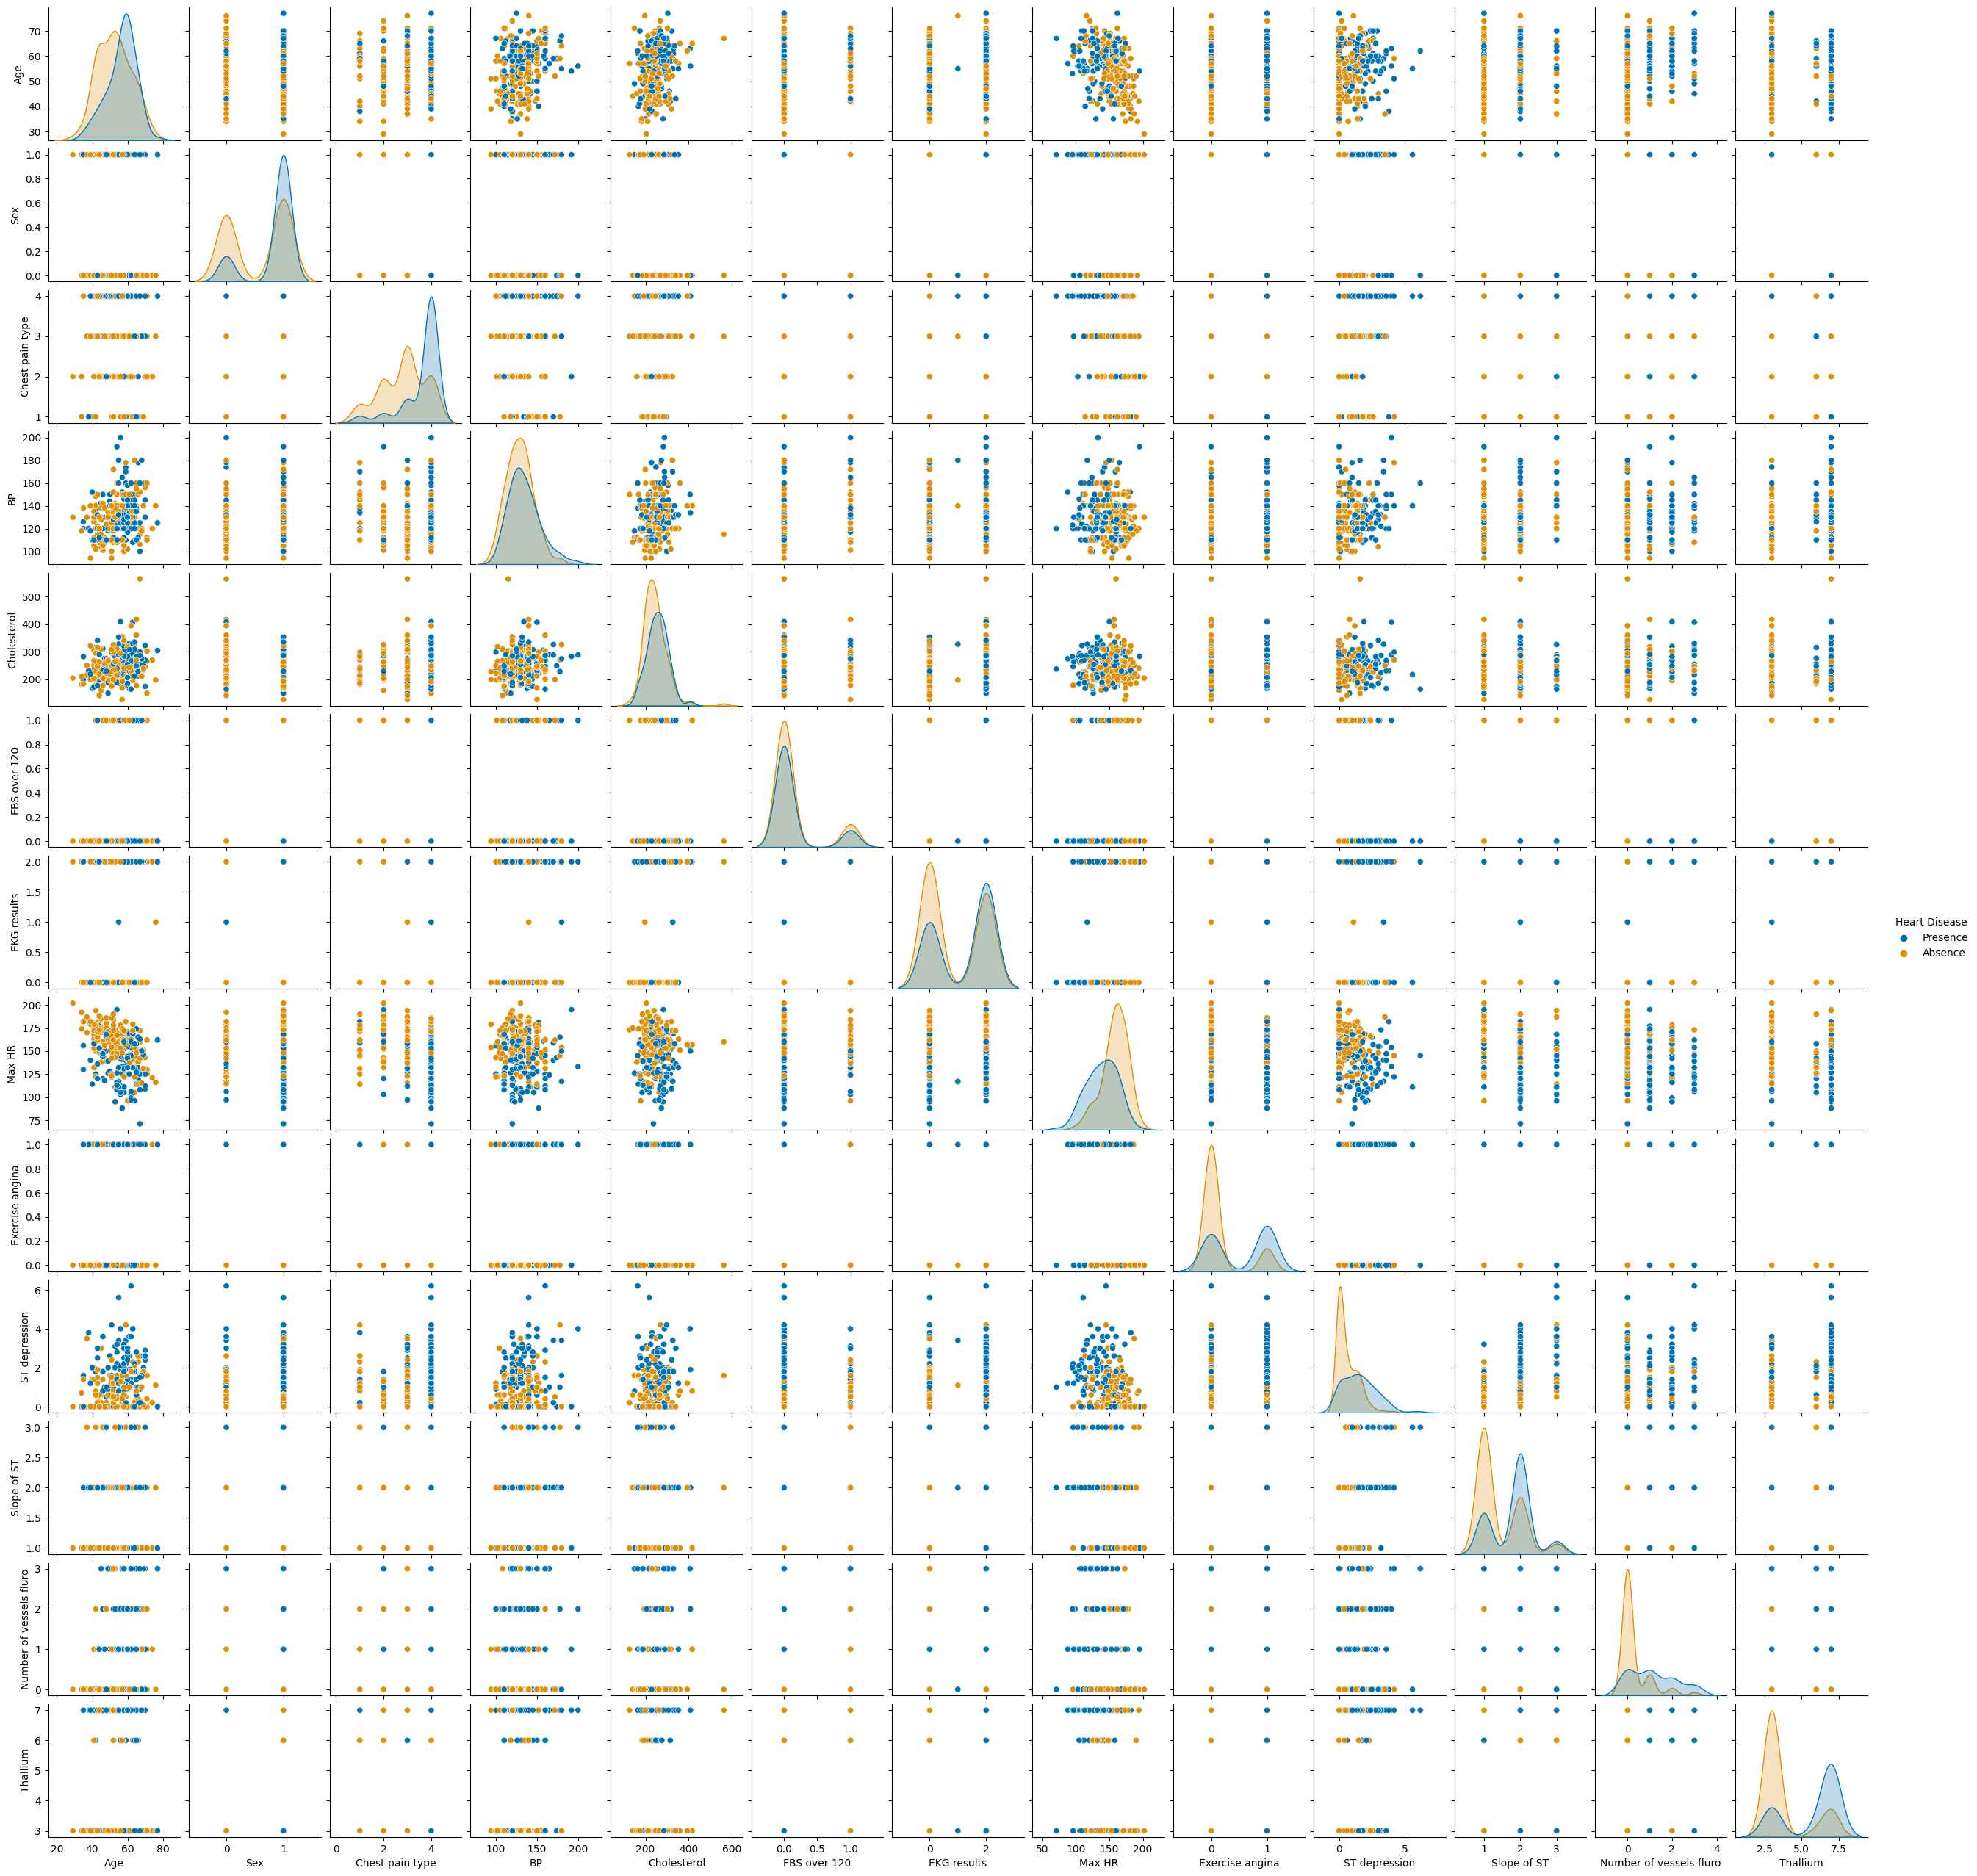

In [ ]:
# Let's create pairplot to visualise the data for each pair of attributes
import seaborn as sns
sns.pairplot(heart_df, hue="Heart Disease", height = 2, palette = 'colorblind');

## **Split the features and target**

In [ ]:
X = heart_df.drop(columns='Heart Disease', axis=1)
Y = heart_df['Heart Disease']


## **Split data into training and testing data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state = 2)
print("X shape: ", X.shape)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y shape: ", Y.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X shape:  (270, 13)
X_train shape:  (216, 13)
X_test shape:  (54, 13)
Y shape:  (270,)
Y_train shape:  (216,)
Y_test shape:  (54,)


## **Feature Selection**

In [ ]:

# Threshold for removing correlated variables
threshold = 0.9

# Create correlation matrix
corr_matrix = heart_df.drop('Heart Disease', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features from both training and test datasets
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)


In [ ]:
# Print final features after dropping correlated ones
print("Final Features:")
print(X_train.columns)


Final Features:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create LinearRegression Instance
lgrm = LogisticRegression(max_iter=1000)
lgrm.fit(X_train, Y_train)
#accuracy on train data
X_prediction = lgrm.predict(X_train)
train_accuracy = accuracy_score(X_prediction,Y_train)+
print('Accuracy on training data:', train_accuracy)
#accuracy on test data
X_test_prediction = lgrm.predict(X_test)
score_1r = accuracy_score(X_test_prediction,Y_test)
print("----------------------------------")
print('The accuracy of the Logistic Regression is: {}'.format(score_1r))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('Logistic Regression', score_1r))

Accuracy on training data: 0.8888888888888888
----------------------------------
The accuracy of the Logistic Regression is: 0.7962962962962963
----------------------------------


## **SVM Algorithm**

In [ ]:
from sklearn import metrics
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector machine (SVM) Algorithm
model_svm = svm.SVC() #select the algothim
model_svm.fit(X_train, Y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = accuracy_score(y_prediction_svm, Y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.5926
----------------------------------


## **Decision Tree Algorithm**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, Y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, Y_test).round(4)
print("----------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("----------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

----------------------------------
The accuracy of the DT is: 0.6296
----------------------------------


## **LR Algo**

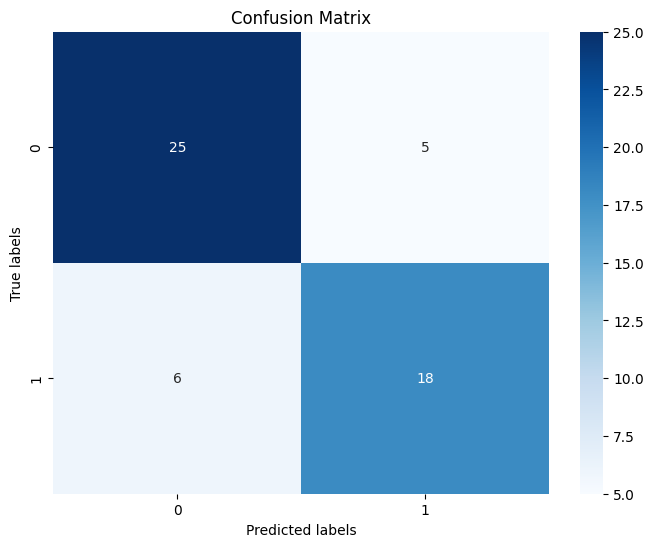


Precision: 0.782608695652174

Recall: 0.75

F1 Score: 0.7659574468085107


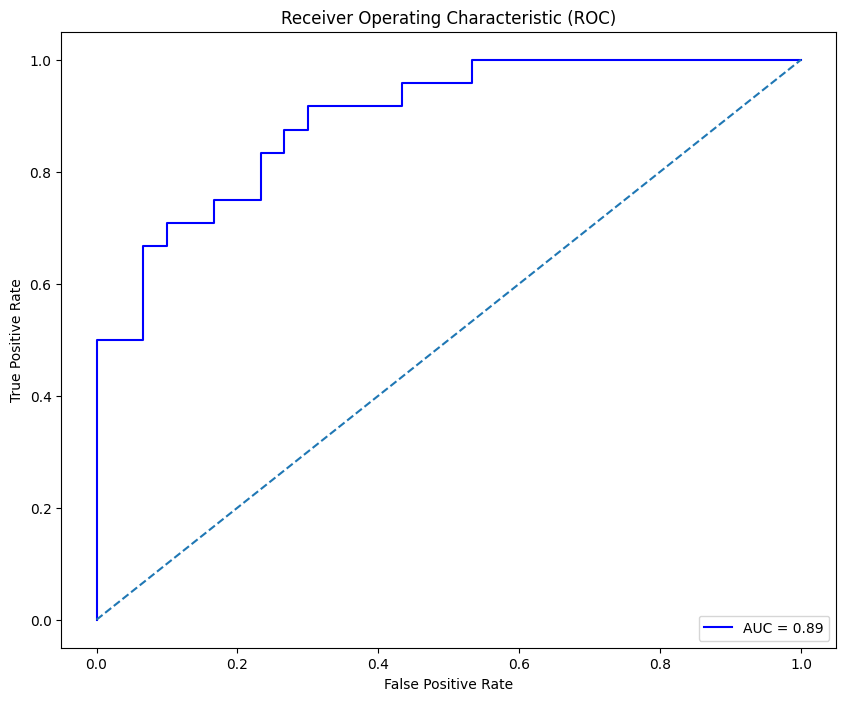

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create and Train Logistic Regression Model
lgrm = LogisticRegression(max_iter=1000)
lgrm.fit(X_train, Y_train)

# Predictions
y_pred = lgrm.predict(X_test)
y_prob = lgrm.predict_proba(X_test)[:,1]  # Probability estimates of the positive class

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Precision
precision = precision_score(Y_test, y_pred, pos_label='Presence')
print("\nPrecision:", precision)

# Recall
recall = recall_score(Y_test, y_pred, pos_label='Presence')
print("\nRecall:", recall)


# F1 Score
f1 = f1_score(Y_test, y_pred, pos_label='Presence')
print("\nF1 Score:", f1)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label='Presence')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## **SVM**

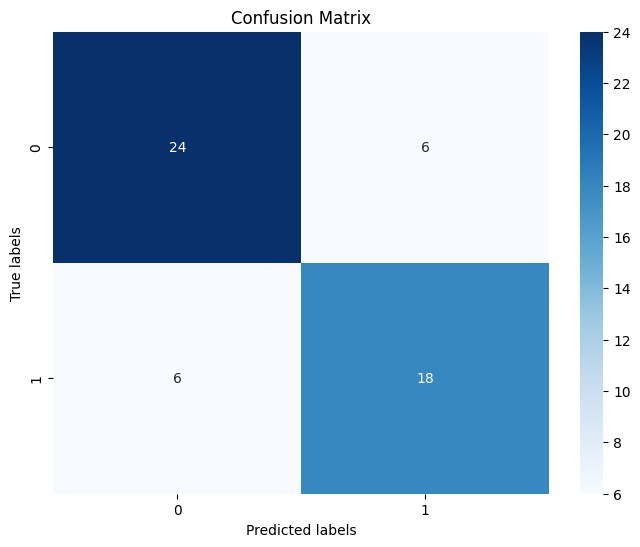


Precision: 0.75

Recall: 0.75

F1 Score: 0.75


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

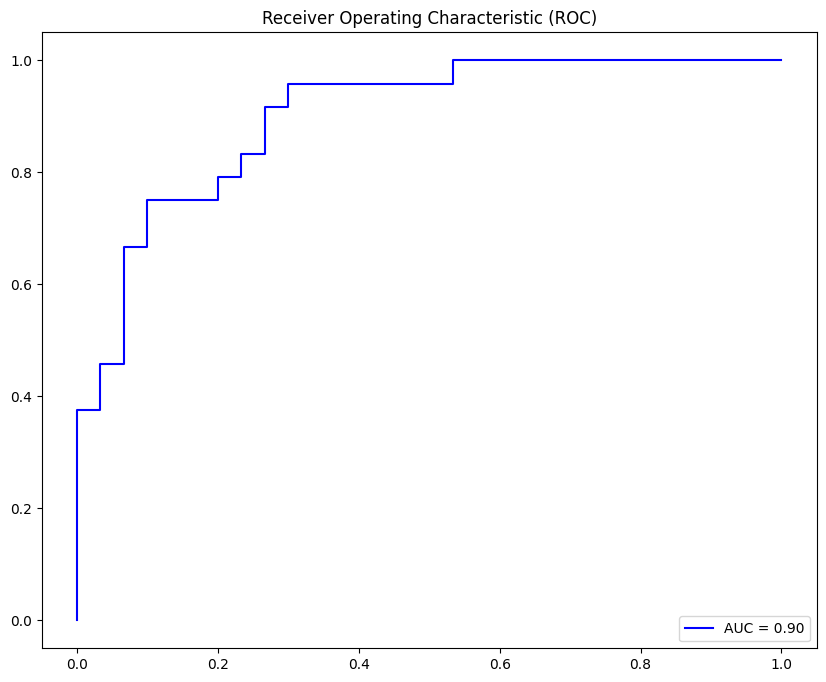

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create and Train SVM Model
svm_model = SVC(probability=True, kernel='linear')  # Using a linear kernel as an example
svm_model.fit(X_train, Y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:,1]  # Probability estimates of the positive class

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Precision
precision = precision_score(Y_test, y_pred, pos_label='Presence')
print("\nPrecision:", precision)

# Recall
recall = recall_score(Y_test, y_pred, pos_label='Presence')
print("\nRecall:", recall)

# F1 Score
f1 = f1_score(Y_test, y_pred, pos_label='Presence')
print("\nF1 Score:", f1)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label='Presence')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot


** For DT ALgo**

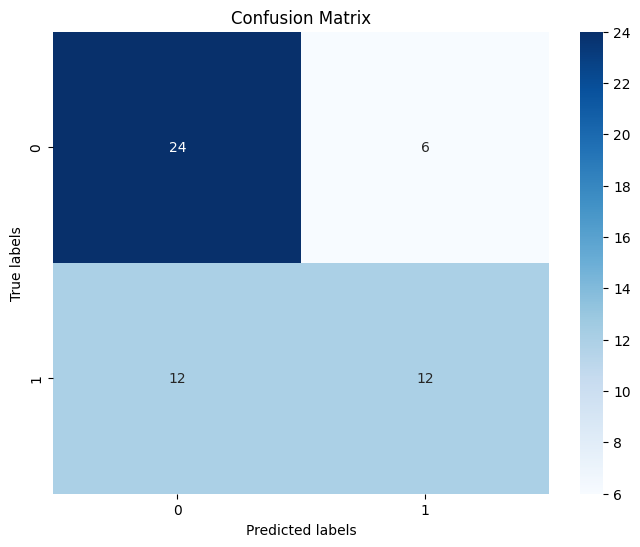


Precision: 0.6666666666666666

Recall: 0.5

F1 Score: 0.5714285714285715


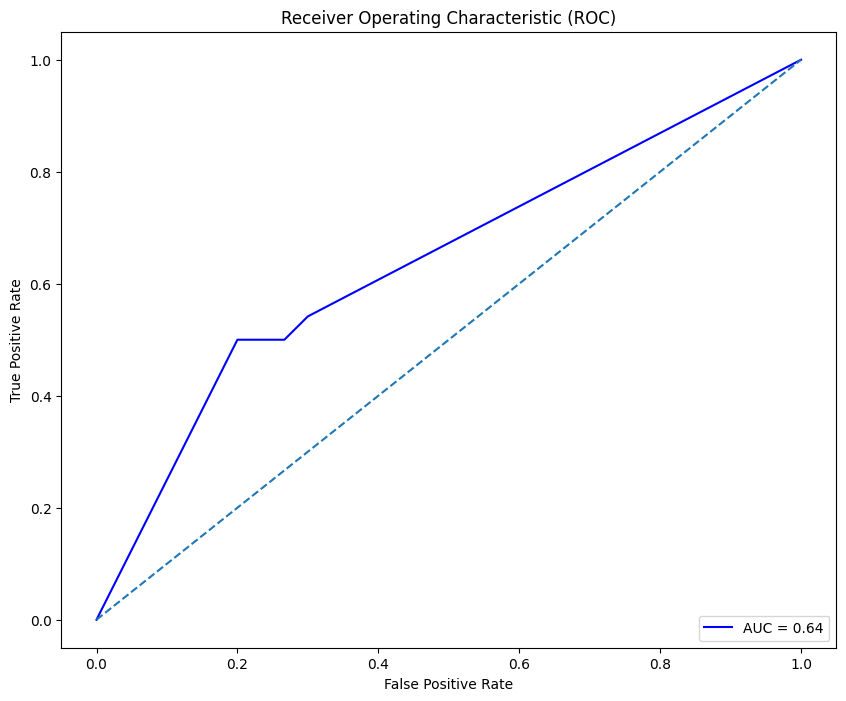

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Create and Train Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:,1]  # Probability estimates of the positive class

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Precision
precision = precision_score(Y_test, y_pred, pos_label='Presence')
print("\nPrecision:", precision)

# Recall
recall = recall_score(Y_test, y_pred, pos_label='Presence')
print("\nRecall:", recall)

# F1 Score
f1 = f1_score(Y_test, y_pred, pos_label='Presence')
print("\nF1 Score:", f1)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label='Presence')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


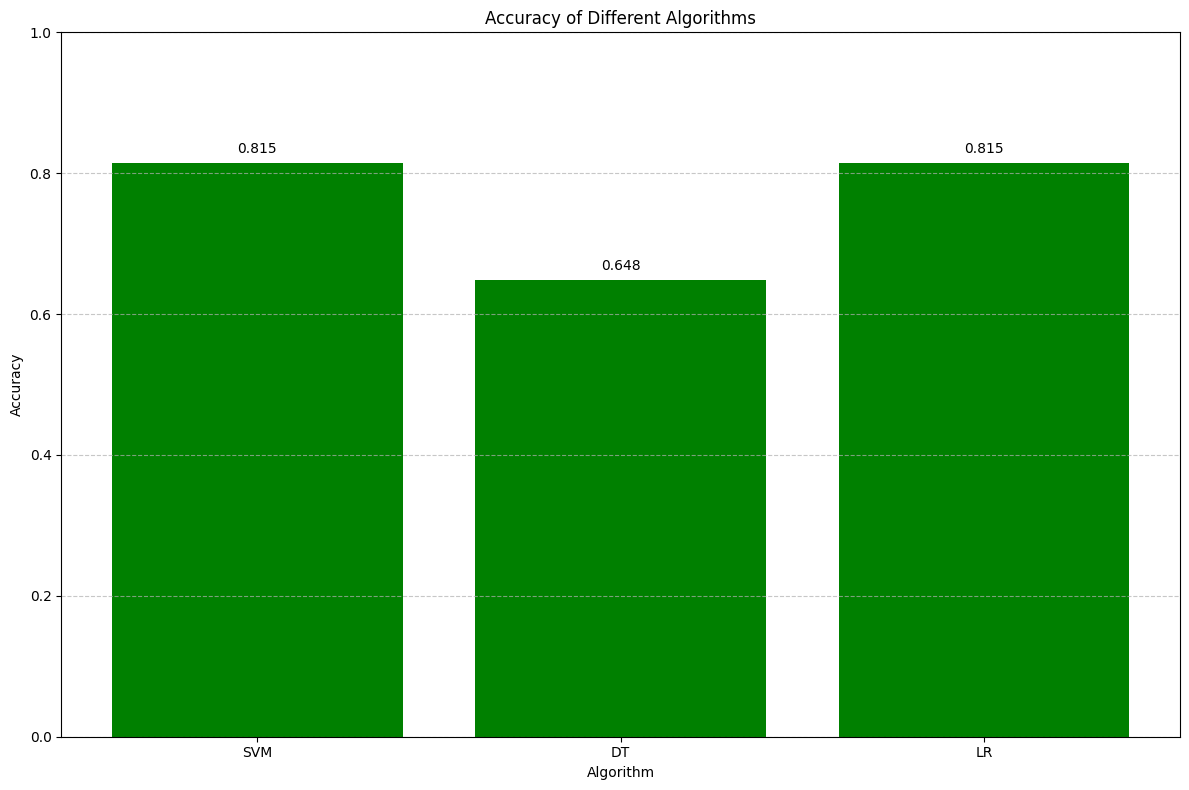

In [ ]:
import matplotlib.pyplot as plt

# Data
algorithms = ['SVM', 'DT', 'LR' ]
accuracies = [0.8148, 0.6481, 0.8148]

# Create bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(algorithms, accuracies, color=['green', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # assuming accuracy is in percentage form
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the exact accuracy above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', color='k')

# Display the plot
plt.tight_layout()
plt.show()
